# Titanic Survival Predictor Using Logistic Regression

# Dataset : Titanic Datset

# Atrribute Information



    1) survival: Survival (0 = No; 1 = Yes) 

    2) pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) 

    3) name: Name 

    4)sex: Sex 

    5) age: Age 

    6) sibsp: Number of Siblings/Spouses Aboard 
     
    7) parch: Number of Parents/Children Aboard 

    8) ticket: Ticket Number 

    9) fare: Passenger Fare 

    10) cabin: Cabin 

    11) Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) 

# Variable Notes

    pclass: A proxy for socio-economic status (SES)
        1st = Upper
        2nd = Middle
        3rd = Lower
    
    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in the following way:
        1.Sibling = brother, sister, stepbrother, stepsister
        2.Spouse = husband, wife (mistresses and fiancés were ignored)
    
    parch: The dataset defines family relations in the following way
        1.Parent = mother, father
        2.Child = daughter, son, stepdaughter, stepson
        3.Some children traveled only with a nanny, therefore parch=0 for them.

# Importing Data

In [1]:
import numpy as np                       # linear algebra
import pandas as pd                      # data processing and Manipulation
import seaborn as sns                    # Data visualization
import matplotlib.pyplot as plt          # Data visualization
import warnings                          # Hiding Warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\abhi\\Desktop\\data Analytics course\\Datasets\\titanic_dataset.csv")

# Exploratory Data Anlysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.size

10692

In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Preprocessing

Steps involved in Data Preprocessing :

__*Data cleaning*__

__*Identifying and removing outliers*__

__*Encoding categorical variables*__

In [9]:
#Data Cleaning (Dropping out unimportant features)
df=df.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1)

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#cheacking missing or null values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
df.count()

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

__*Ok, we can see 891 total. There are some null values for some columns, later we are going to deal with that.*__

In [13]:
df.Age.median()

28.0

In [14]:
df.Embarked.mode()[0]

'S'

In [15]:
#Imputing Missing Value by correspinding mean,median and mode.
df["Age"]=df.Age.fillna(df.Age.median())
df["Embarked"]=df["Embarked"].fillna(df.Embarked.mode()[0])

In [16]:
#Imputation of missing value is successful.
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Survived       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Pclass      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Age         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SibSp          AxesSubplot(0.125,0.391471;0.227941x0.222059)
Parch       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Fare        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

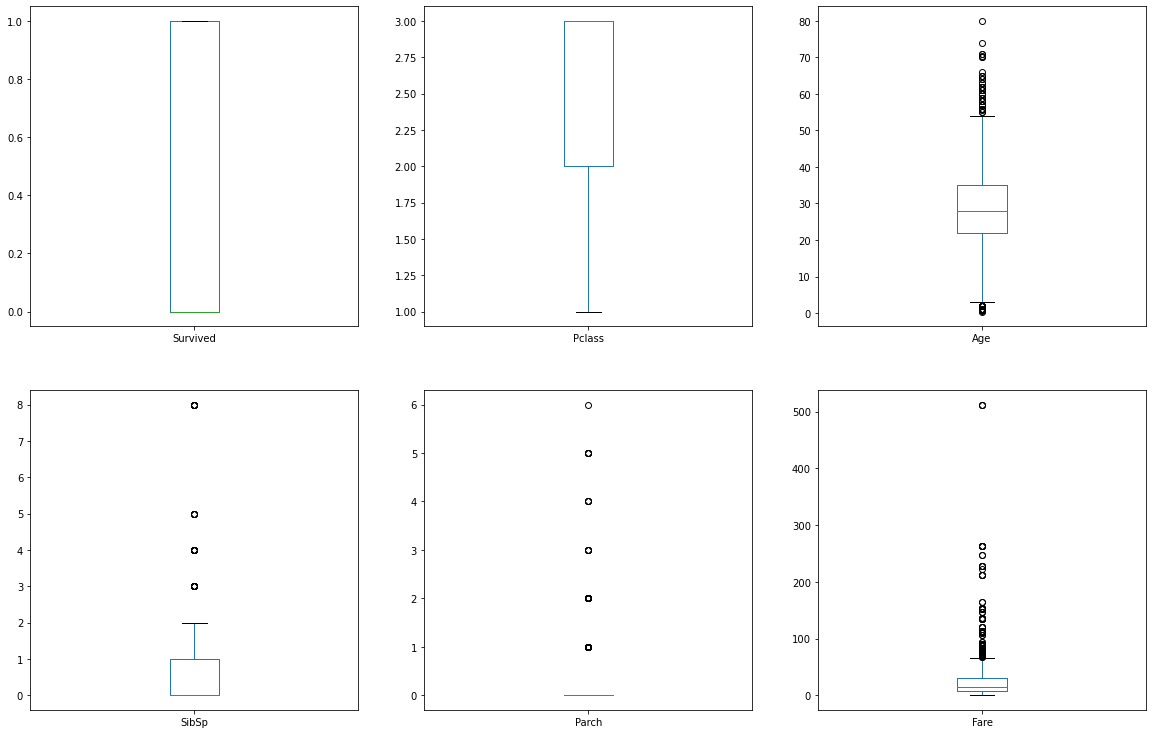

In [17]:
#Outlier Detection.
df.plot(kind="box",subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=(20,20))

In [18]:
df=df.loc[(df.Age<50) & (df.Age>15)]
df=df[df.SibSp<15]
df=df[df.Parch<2]
df=df[df.Fare>20.0]

Survived       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Pclass      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Age         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SibSp          AxesSubplot(0.125,0.391471;0.227941x0.222059)
Parch       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Fare        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

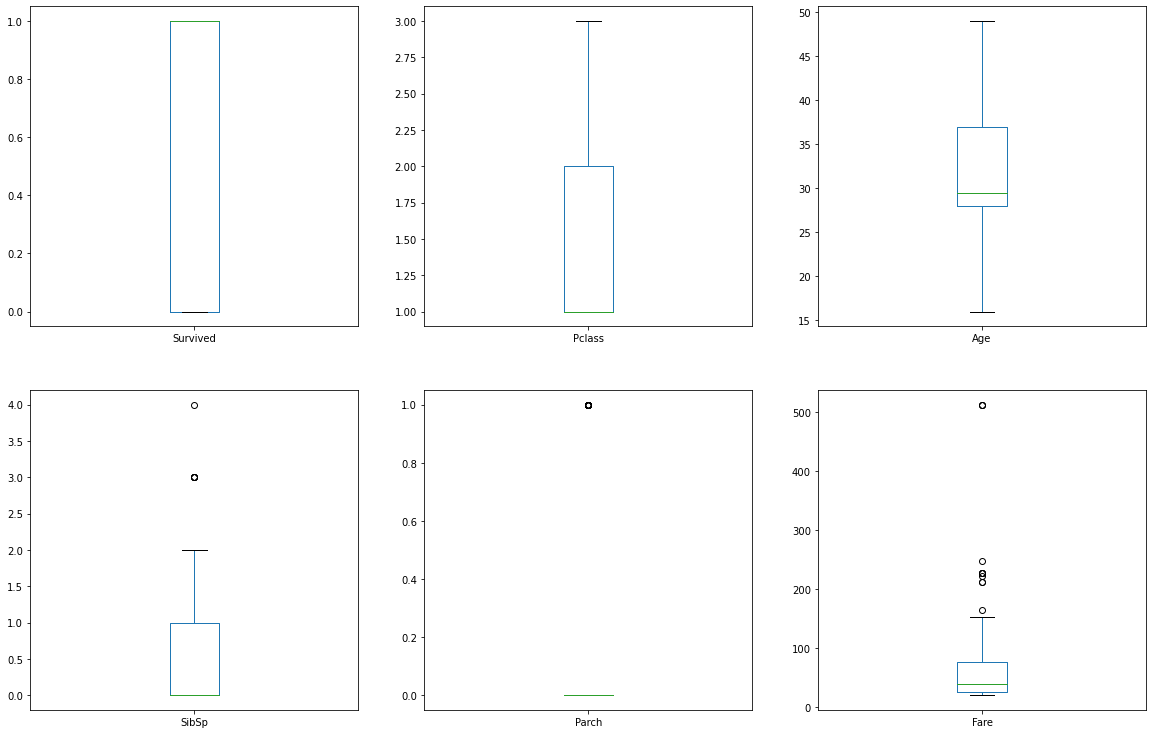

In [19]:
df.plot(kind="box",subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=(20,20))

__*Now there is no more outliers present in the dataset*__

#  Data Visualization

__*Age*__

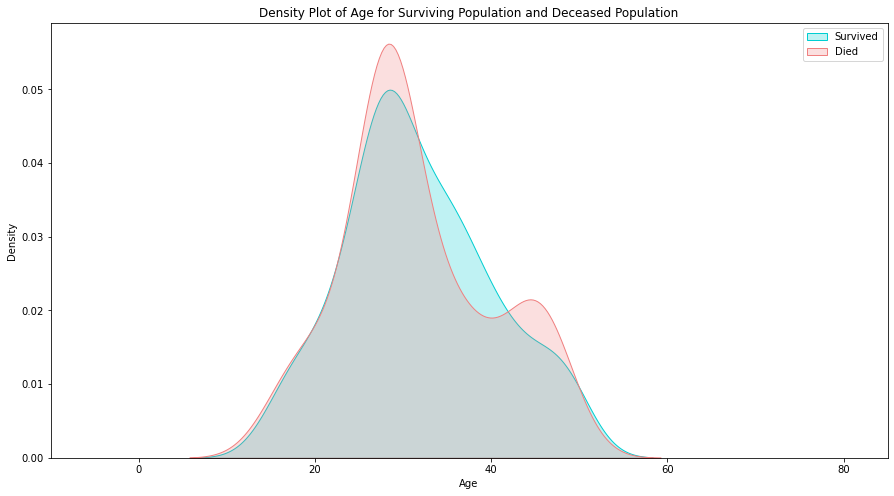

In [20]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Age"][df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Age"][df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

__*The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.*__

__*Fair*__

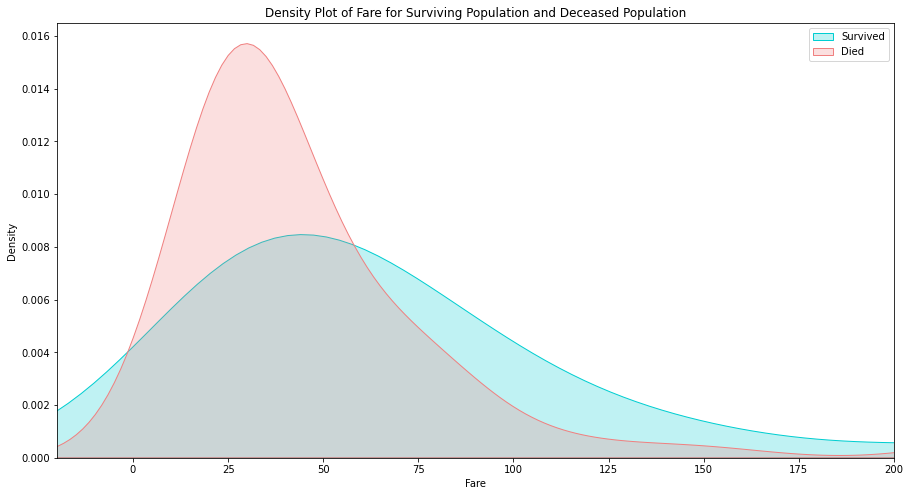

In [21]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Fare"][df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Fare"][df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

__*As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next.*__

__*Pclass*__

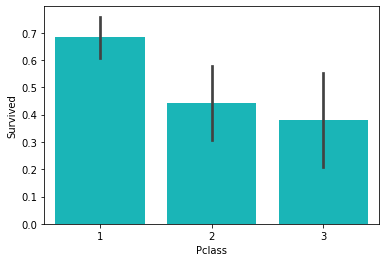

In [22]:
sns.barplot('Pclass', 'Survived', data=df, color="darkturquoise")
plt.show()

Text(0.5, 0.98, 'Class and gender wise segregation of passengers')

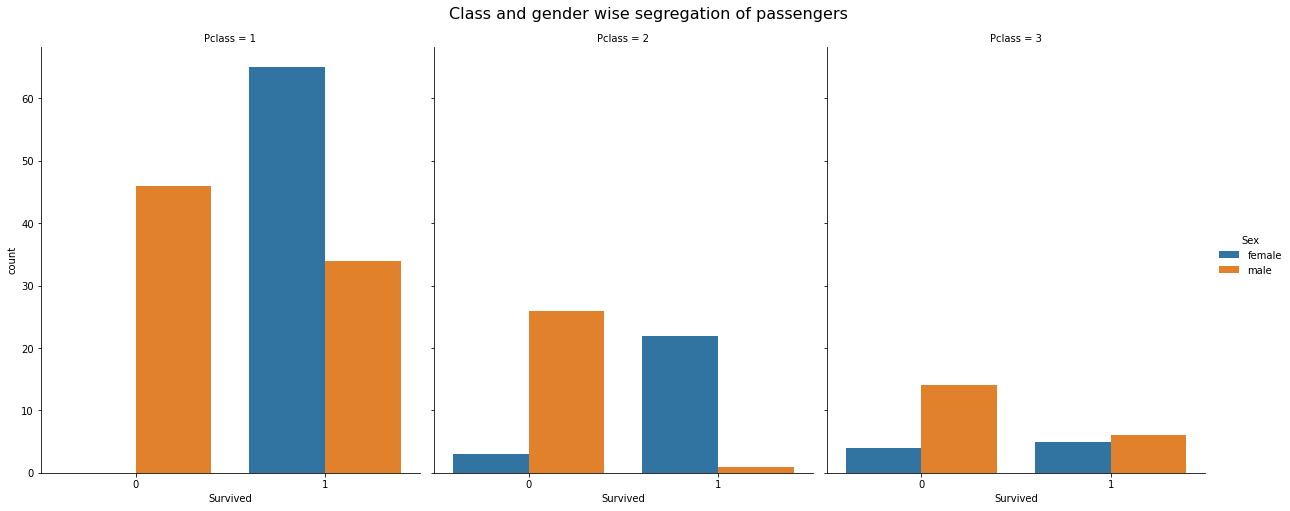

In [23]:
sns.factorplot('Survived', col='Pclass', hue='Sex', data=df, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class and gender wise segregation of passengers', fontsize=16)

__*we can see that class played an important for the Survival of Male and Female passengers. 
Unsurprisingly, being a first class passenger was safest.*__

__*Embarked Port*__

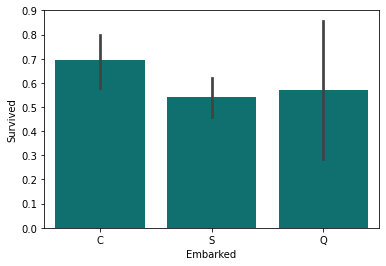

In [24]:
sns.barplot('Embarked', 'Survived', data=df, color="teal")
plt.show()

__*Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).
It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.*__

__*Gender*__

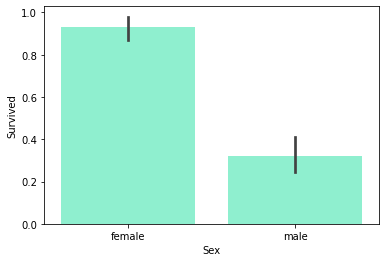

In [25]:
sns.barplot('Sex', 'Survived', data=df, color="aquamarine")
plt.show()

__*This is a very obvious difference. Clearly being female greatly increased your chances of survival.*__

# Splitting data into dependent and independent variable

In [26]:
#Features Encoding
from sklearn.preprocessing import LabelEncoder

In [27]:
lb=LabelEncoder()

In [28]:
lst=[]
for i in df.columns:
    if df[i].dtype=="O":
        lst.append(i)
        
lst        

['Sex', 'Embarked']

In [29]:
for i in lst:
    df[i]=lb.fit_transform(df[i])
    

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,0
3,1,1,0,35.0,1,0,53.1000,2
20,0,2,1,35.0,0,0,26.0000,2
23,1,1,1,28.0,0,0,35.5000,2
30,0,1,1,40.0,0,0,27.7208,0


In [31]:
#Checking Multicollinearity
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.249337,-0.611439,0.014770,-0.114582,-0.018248,0.183058,-0.143854
Pclass,-0.249337,1.000000,0.064987,-0.210306,0.420336,0.273861,-0.320965,0.288728
Sex,-0.611439,0.064987,1.000000,0.080375,-0.120174,-0.184726,-0.126289,0.072783
Age,0.014770,-0.210306,0.080375,1.000000,-0.057705,-0.051797,0.039728,-0.002937
SibSp,-0.114582,0.420336,-0.120174,-0.057705,1.000000,0.249766,-0.153884,0.101785
Parch,-0.018248,0.273861,-0.184726,-0.051797,0.249766,1.000000,0.000522,0.087114
Fare,0.183058,-0.320965,-0.126289,0.039728,-0.153884,0.000522,1.000000,-0.324090
Embarked,-0.143854,0.288728,0.072783,-0.002937,0.101785,0.087114,-0.324090,1.000000


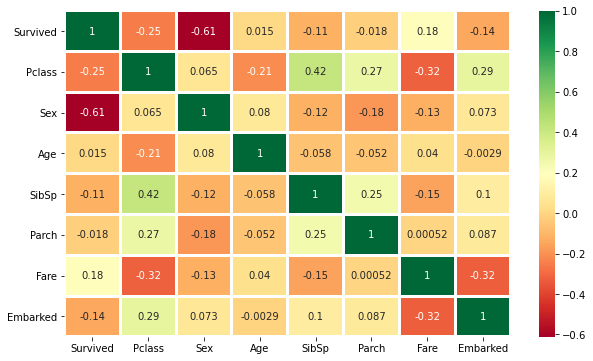

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn",linewidth=2)
plt.show()

__*There is no any kind of multicollinearity between the independent variables.*__

In [33]:
x=df.drop(columns="Survived")
y=df.Survived

In [34]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,0
3,1,0,35.0,1,0,53.1000,2
20,2,1,35.0,0,0,26.0000,2
23,1,1,28.0,0,0,35.5000,2
30,1,1,40.0,0,0,27.7208,0


In [35]:
y.head()

1     1
3     1
20    0
23    1
30    0
Name: Survived, dtype: int64

# Splitting Data into train test

__*Now I split variable into training and testing sets. I will perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of data in train dataset and the rest 30% in test dataset.*__

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

In [38]:
X_train.shape,X_test.shape

((158, 7), (68, 7))

In [39]:
y_train.shape,y_test.shape

((158,), (68,))

# Building a LogisticRegression  Model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score, ConfusionMatrixDisplay

In [41]:
model_l=LogisticRegression()

In [42]:
model_l.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred_l=model_l.predict(X_test)

In [44]:
df=pd.DataFrame(y_pred_l,y_test)
df.head()

,0
Survived,
0,0
1,0
1,0
1,0
1,1


In [45]:
accuracy_score(y_test,y_pred_l)

0.7647058823529411

In [46]:
precision_score(y_test,y_pred_l)

0.8333333333333334

In [47]:
recall_score(y_test,y_pred_l)

0.6944444444444444

In [48]:
print(classification_report(y_pred_l,y_test))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77        38
           1       0.69      0.83      0.76        30

    accuracy                           0.76        68
   macro avg       0.77      0.77      0.76        68
weighted avg       0.78      0.76      0.77        68



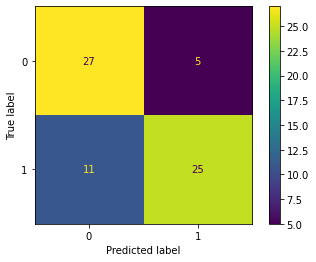

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_l)

In [50]:
Random_State=[]
for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    model_l=LogisticRegression()
    model_l.fit(X_train,y_train)
    y_pred_l=model_l.predict(X_test)
    Random_State.append(accuracy_score(y_test,y_pred_l))
    random_no=Random_State.index(max(Random_State))
    accuracy=max(Random_State)

maxi_iter=[]
for i in range(0,1000,50):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_no)
    model=LogisticRegression(max_iter=i)
    model.fit(X_train,y_train)
    y_pred_l=model.predict(X_test)
    maxi_iter.append(accuracy_score(y_test,y_pred_l))
    accuracy=max(Random_State)
    
    

print("Random State Number :",random_no,"Accuracy Score : ",accuracy)
    
print("Maximum iteration number : ",(maxi_iter.index(max(maxi_iter)))*50,"Accuracy Score : ",accuracy)
    

Random State Number : 5 Accuracy Score :  0.8382352941176471
Maximum iteration number :  100 Accuracy Score :  0.8382352941176471


In [51]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=5)

lr_model = LogisticRegression(max_iter=100)
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
df=pd.DataFrame(y_pred_lr,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n--------------------------------------------------------")
print("Accuracy_score :",accuracy_score(y_test,y_pred_lr),"\n\n--------------------------------------------------------")
print("Precision_score :",precision_score(y_test,y_pred_lr),"\n\n--------------------------------------------------------")
print("Recall_score :",recall_score(y_test,y_pred_lr),"\n\n--------------------------------------------------------")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred_lr))

Table of Predicted and Actual values :
           0
Survived   
1         1
1         1
0         0
0         0
1         1 

--------------------------------------------------------
Accuracy_score : 0.8382352941176471 

--------------------------------------------------------
Precision_score : 0.9032258064516129 

--------------------------------------------------------
Recall_score : 0.7777777777777778 

--------------------------------------------------------
Confusion_matrix : 
 [[29  3]
 [ 8 28]]


In [52]:
#Entering new data to get milk quality grade

Pclass = int(input('Input Pclass(1 or 2 or 3) = '))
Sex = int(input('Input Sex(0 or 1) = '))
Age = float(input('Input Age = '))
SibSp = int(input('Input SibSp(0 or 1 or 2 or 3 or 4) = '))
Parch= float(input('Input Parch(0 or 1) = '))
Fare= float(input('Input fare = '))
Embarked= int(input('Input Embarked(0 or 1 or 2) = '))

features = [[Pclass,Sex,Age,SibSp,Parch,Fare,Embarked]]

predict_data=lr_model.predict(features)
print('Passenger is ', predict_data)

if predict_data==[0]:
    print("Passenger may not be survived")
else :
    print("Passenger may be survived")


Input Pclass(1 or 2 or 3) = 2
Input Sex(0 or 1) = 1
Input Age = 35
Input SibSp(0 or 1 or 2 or 3 or 4) = 3
Input Parch(0 or 1) = 0
Input fare = 56
Input Embarked(0 or 1 or 2) = 1
Passenger is  [0]
Passenger may not be survived


# __*Thank You.*__